In [ ]:
pip install jiwer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 17.1 MB/s eta 0:00:00


In [ ]:
pip install rouge

In [ ]:
import csv

answer_data = []
answer_list = []

with open('/content/GROUND_TRUTH_ANSWERS - answers (2).csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip the header row if it exists
    for row in reader:
        answer_data.append({'id': row[0], 'explanation': row[1]})

print(answer_data)

for answer in answer_data:
  answer_list.append(answer['id'])


[{'id': '2464', 'explanation': 'Answer D:  About 50% of people with hypertension are controlled'}, {'id': '2465', 'explanation': 'Answer A:  Increased long-term BP variability is associated with an increased risk of cardiovascular events despite adequate BP control on most visits'}, {'id': '2466', 'explanation': 'Answer D:  Low dietary potassium promotes hypertension by increasing the activity of the sodium-chloride cotransporter (on a high sodium diet)'}, {'id': '2467', 'explanation': 'Answer D:  Add amiloride'}, {'id': '2468', 'explanation': 'Answer B:  In 1 year'}, {'id': '2469', 'explanation': 'Answer B:  Obtain 24-hour ambulatory BP monitoring'}, {'id': '2470', 'explanation': 'Answer D:  Add spironolactone'}, {'id': '2471', 'explanation': 'Answer B:  Home BP tele-monitoring supervised by a health care provider results in higher rates of BP control than usual care Home BP monitoring, with or without remote telemonitoring, is associated with better BP control; therefore, choice B is

In [ ]:
import csv

def load_column_as_list(csv_file, column_name):
    column_list = []
    with open(csv_file, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            column_list.append(row[column_name])
    return column_list

# Example usage
csv_file = '/content/new quesitons - Sheet1.csv'
column_name = 'Question Number'

GPT_4 = load_column_as_list(csv_file, column_name)


In [ ]:
import csv

def load_column_as_list(csv_file, column_name):
    column_list = []
    with open(csv_file, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            column_list.append(row[column_name])
    return column_list

# Example usage
csv_file = '/content/Koala_final_finished - Koala (1).csv'
column_name = 'ID'

KOALA_IDS = load_column_as_list(csv_file, column_name)


In [ ]:
list1 = answer_list
list2 = GPT_4
list3 = KOALA_IDS

intersection = list(set(list1).intersection(list2, list3))
print(intersection)


['2555', '5766', '5519', '5847', '5757', '2814', '5819', '2467', '2962', '5831', '2594', '2545', '2756', '2640', '2822', '5548', '5728', '5585', '2515', '5471', '5430', '2630', '2701', '2607', '2673', '2759', '5571', '5705', '5626', '5470', '5516', '2681', '5637', '2876', '2593', '2505', '5535', '5619', '2517', '5564', '5496', '2815', '5473', '2980', '5806', '5744', '5807', '5776', '2672', '2757', '5631', '2789', '5665', '5655', '2694', '2734', '2795', '5452', '5713', '5736', '5749', '5666', '5492', '2733', '5536', '2611', '2490', '5555', '5794', '5697', '5775', '2492', '5432', '2979', '2488', '5545', '5818', '2953', '5852', '2521', '2974', '5774', '5745', '5588', '2842', '5842', '5837', '2473', '2738', '2848', '5598', '2776', '2872', '2588', '2810', '5634', '2539', '2663', '2627', '5576', '2605', '5784', '2576', '5684', '2469', '2622', '5418', '5503', '5531', '2617', '2972', '5644', '2829', '2827', '2603', '5593', '5640', '2784', '2818', '5601', '2508', '2577', '5559', '5810', '5623',

In [ ]:
import pandas as pd
import re
def extract_explanation(csv_file, input_id):
    df = pd.read_csv(csv_file)
    filtered_df = df[df['ID'] == input_id]

    if not filtered_df.empty:
        pattern = re.compile(r"\(Pick one\):.*")
        modified_string = re.sub(pattern, "",filtered_df['Koala_Output'].iloc[0])

        question_index = modified_string.find("Question:")

        end_line_index = modified_string.find("\n", question_index)

        modified_string = modified_string[end_line_index:]

        lines = modified_string.split("\n")  # Split the string into lines
        modified_string = "\n".join(lines[1:])  # Join the lines excluding the first line

        lines = modified_string.split("\n")  # Split the string into lines
        modified_string = "\n".join(lines[1:])  # Join the lines excluding the first line
        return modified_string


def lookup_answer(answer_data, target_id):
    for item in answer_data:
        if item['id'] == target_id:
            return item['explanation']



In [ ]:
ground_truth = []
predicted = []
for id in intersection:
  ground_truth.append(lookup_answer(answer_data,id))
  predicted.append(extract_explanation('/content/Koala_final_finished - Koala (1).csv',int(id)))


In [ ]:
print(predicted[0])

Choices 
Answer: A. Outpatient minimally invasive parathyroidectomy can achieve excellent control of secondary hyperparathyroidism

Explanation: Parathyroidectomy is a procedure that involves removing abnormal parathyroid tissue in order to control hyperplasia or hyperplasia/carcinoma. The choice between different surgical approaches depends on various factors, including the size and number of abnormal parathyroids, the location of the tumors, and the overall health of the patient. In general, outpatient minimally invasive parathyroidectomy is preferred over open or laparoscopic procedures because it has fewer complications and allows for faster recovery times. However, hospitalization may be necessary if there are any complications during or immediately after the procedure. It's important to note that while parathyroidectomy can effectively control hyperplasia and hyperplasia/carcinoma, it does not necessarily reduce the risk of all-cause or cardiovascular mortality.


In [ ]:
import warnings
warnings.filterwarnings("ignore")


Average Scores with 95% Confidence Intervals:
BLEU Score: 0.0548 +/- 0.0110
Word Error Rate: 10.5872 +/- 0.7673
Cosine Similarity: 0.3103 +/- 0.0168



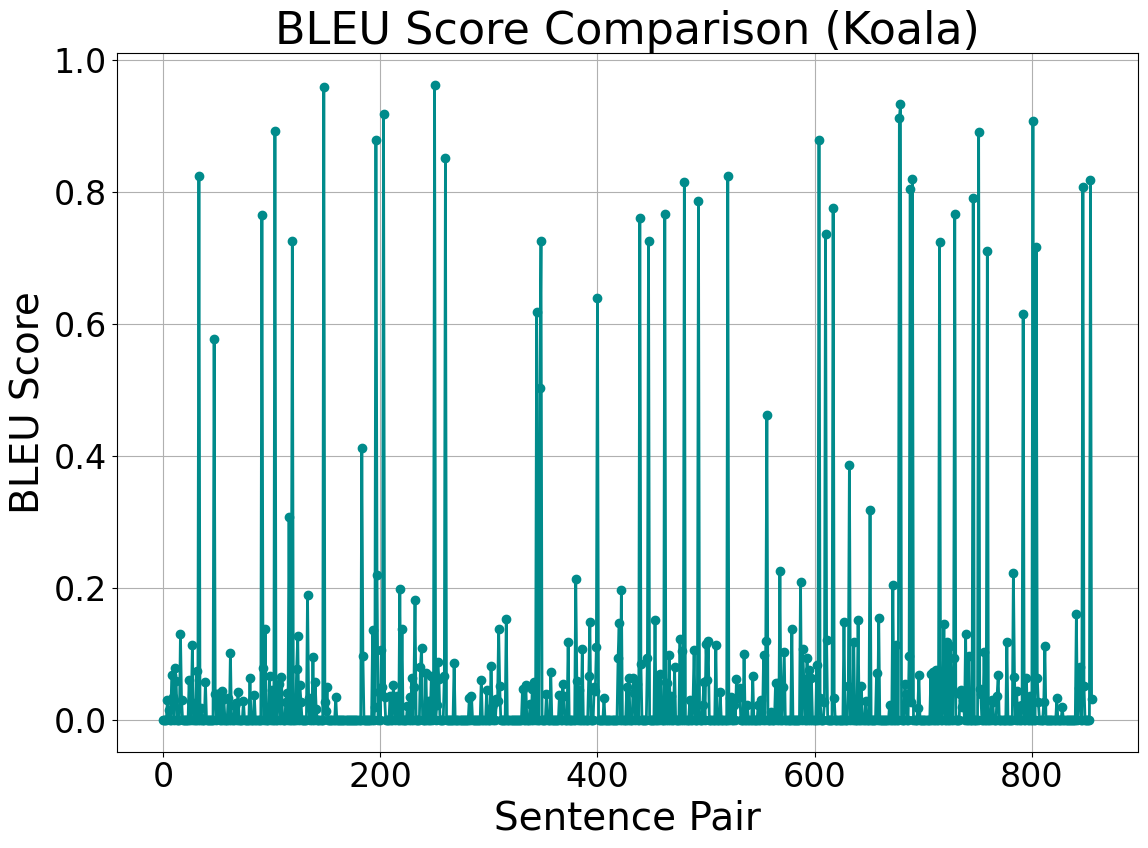

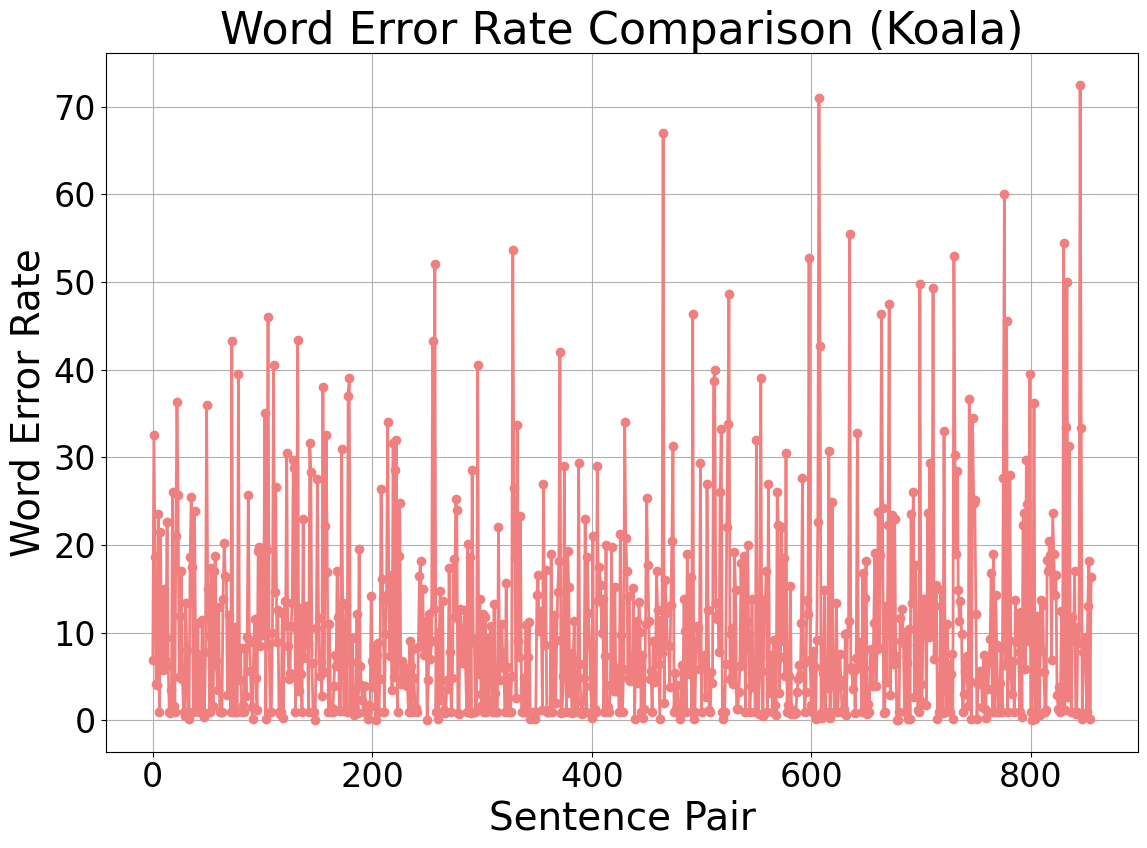

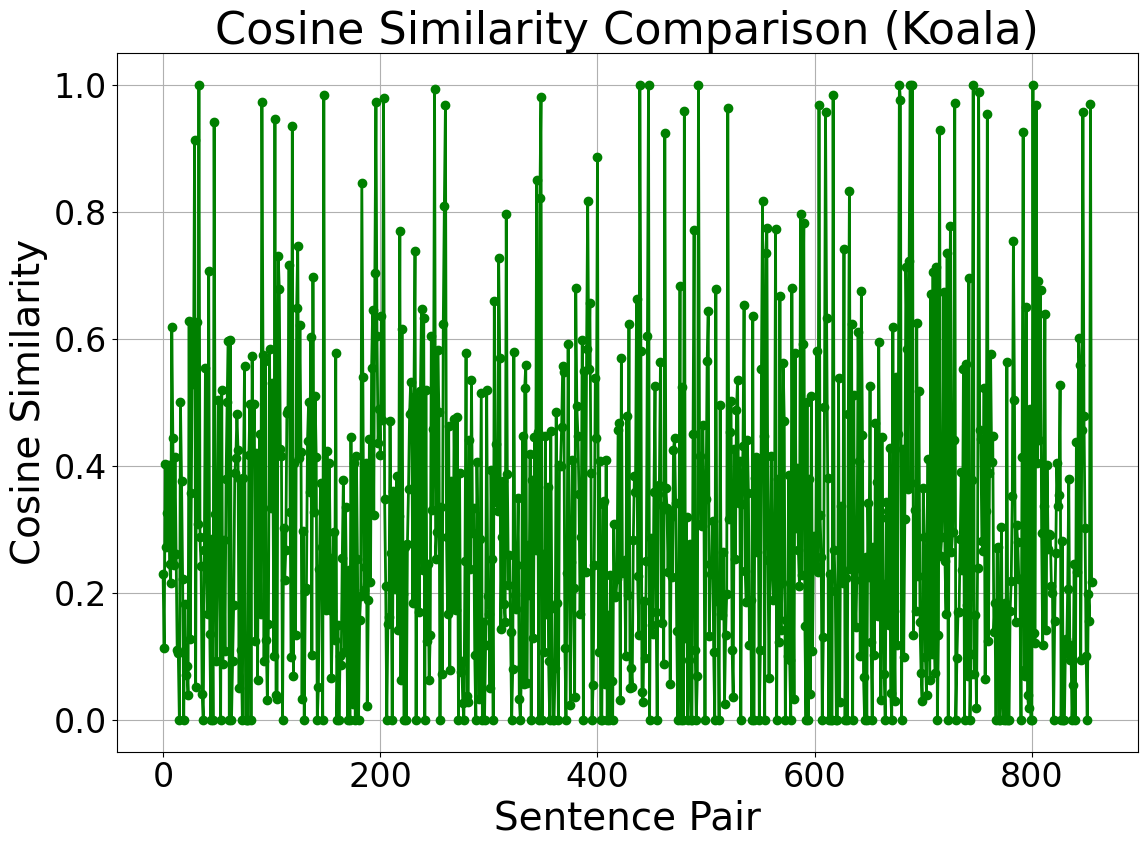

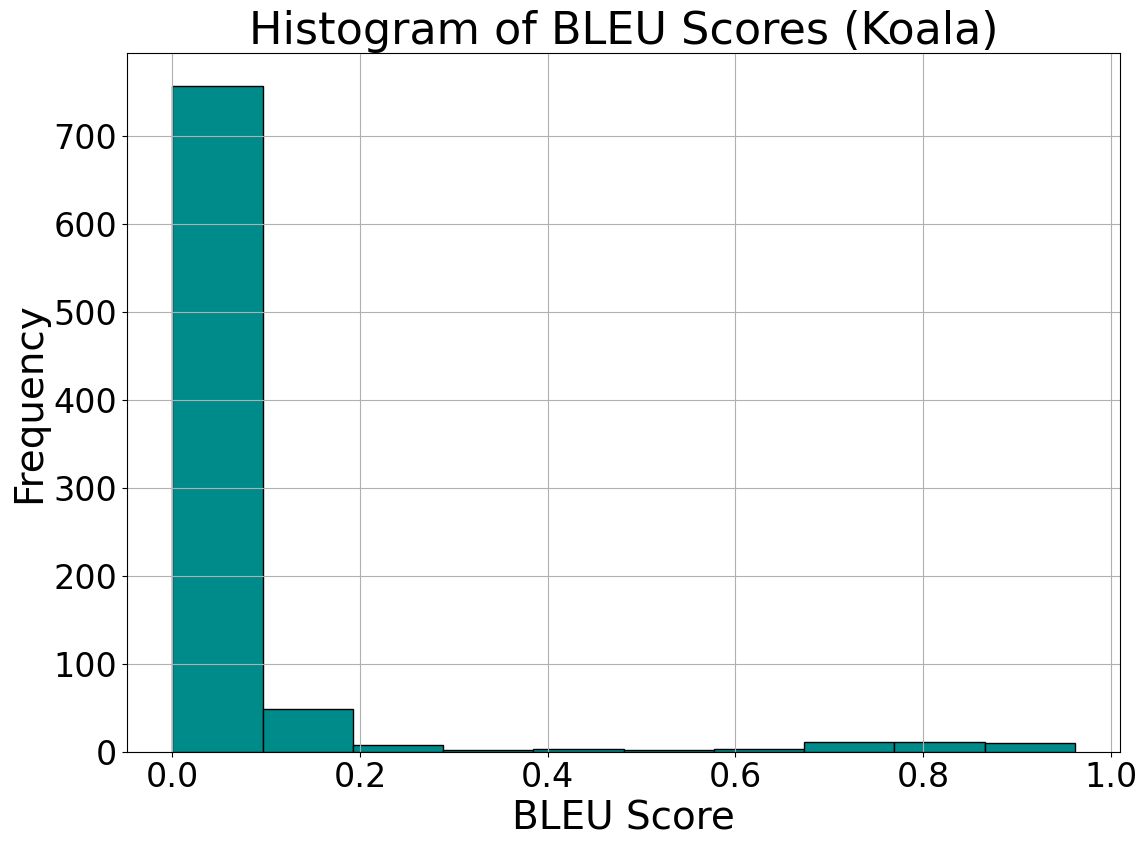

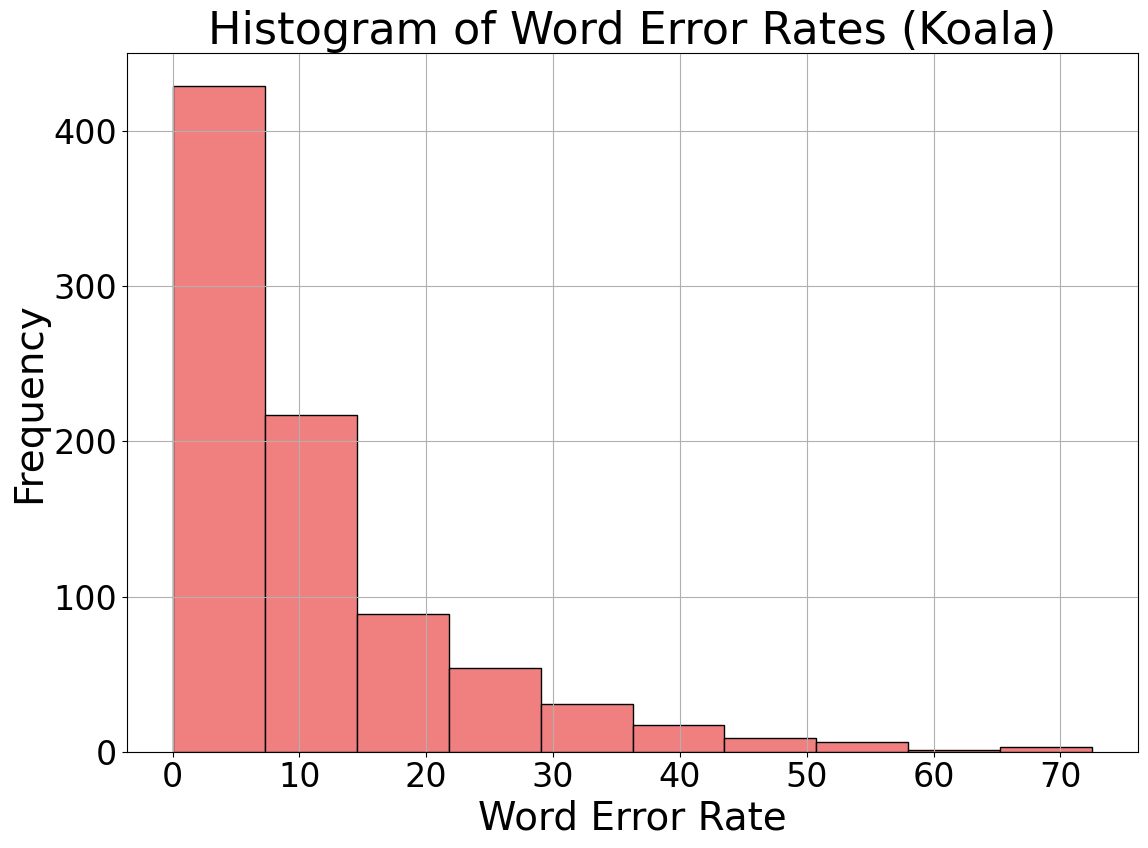

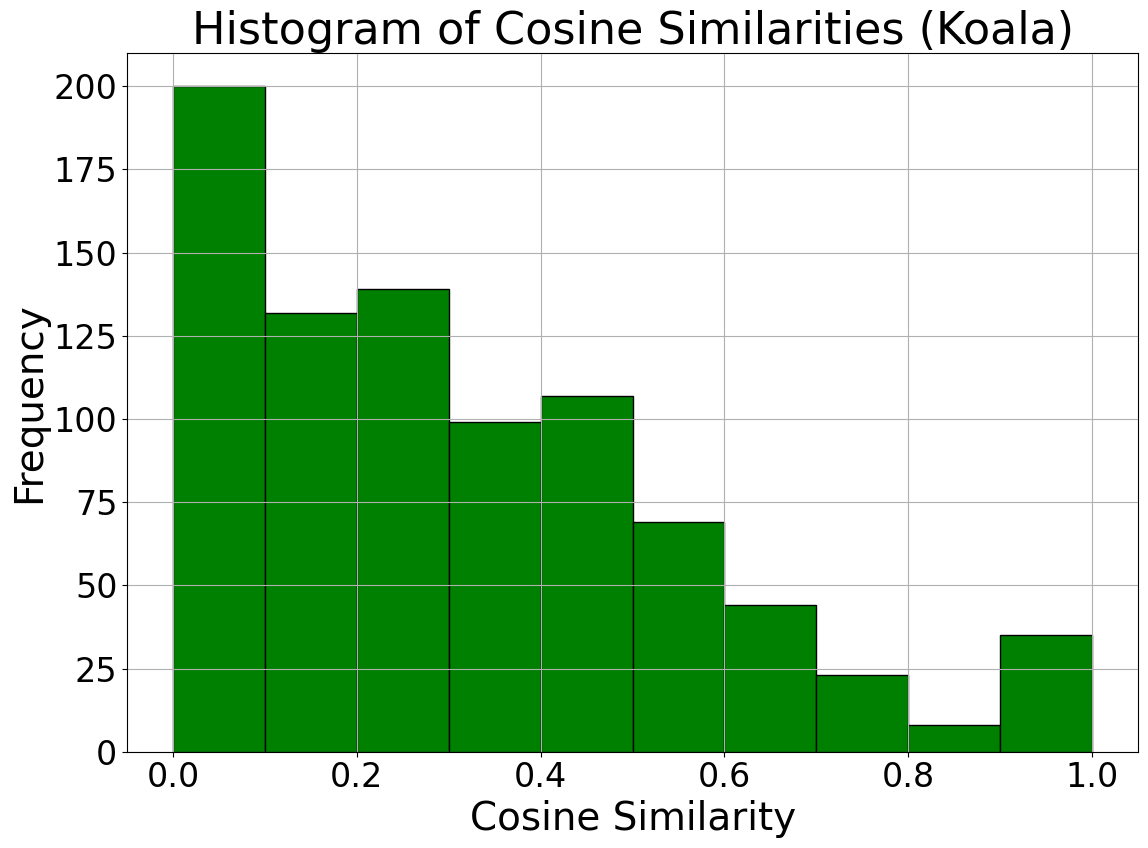

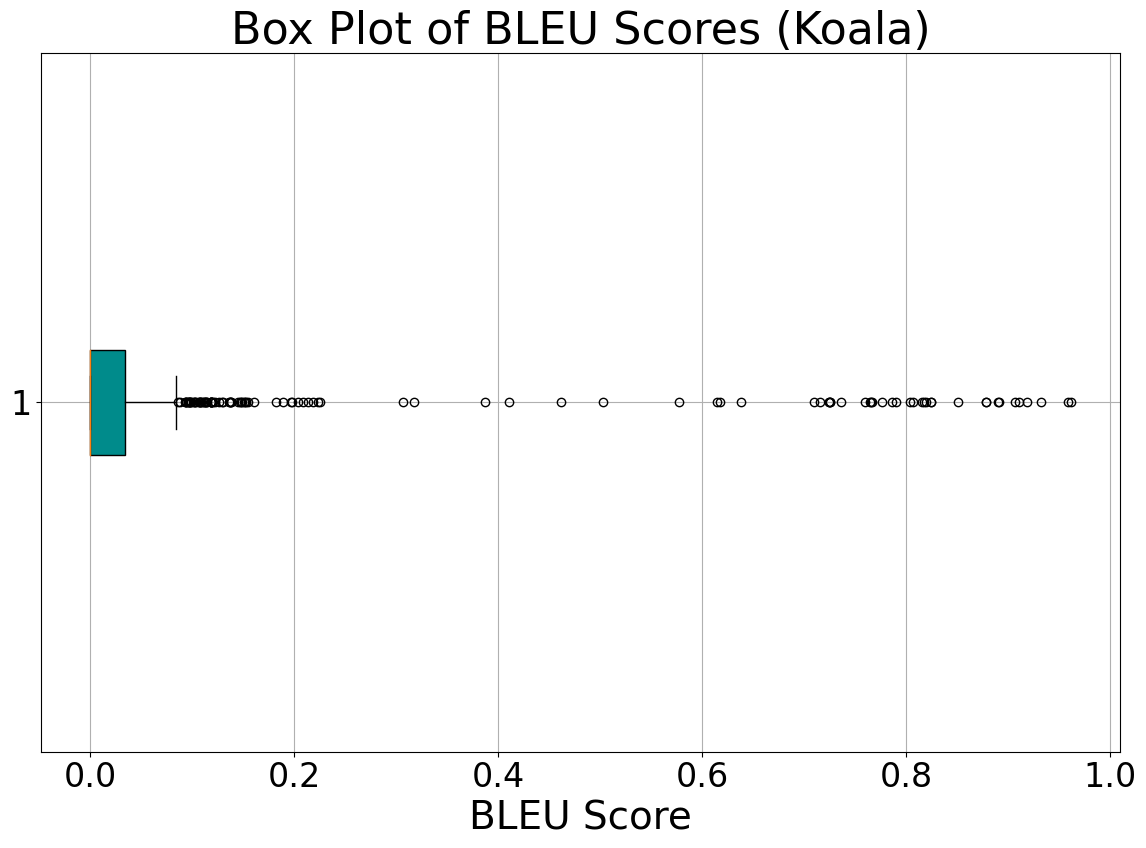

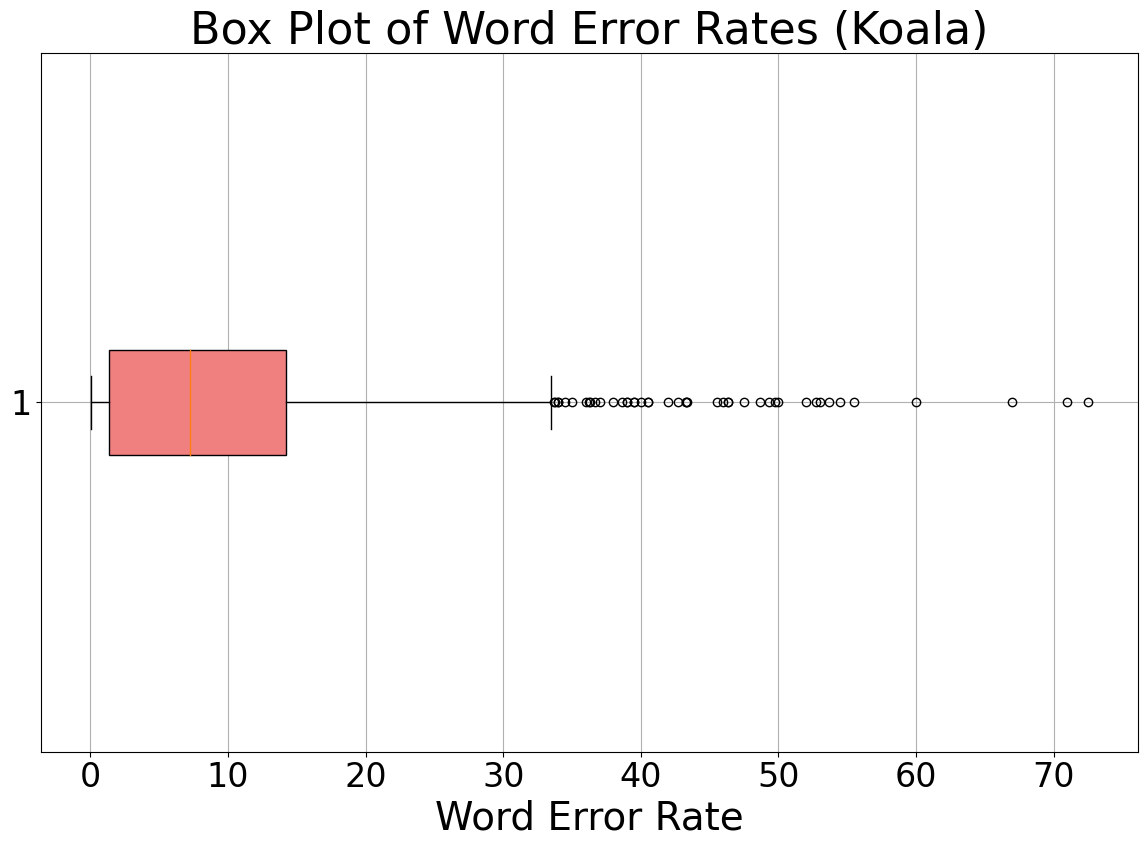

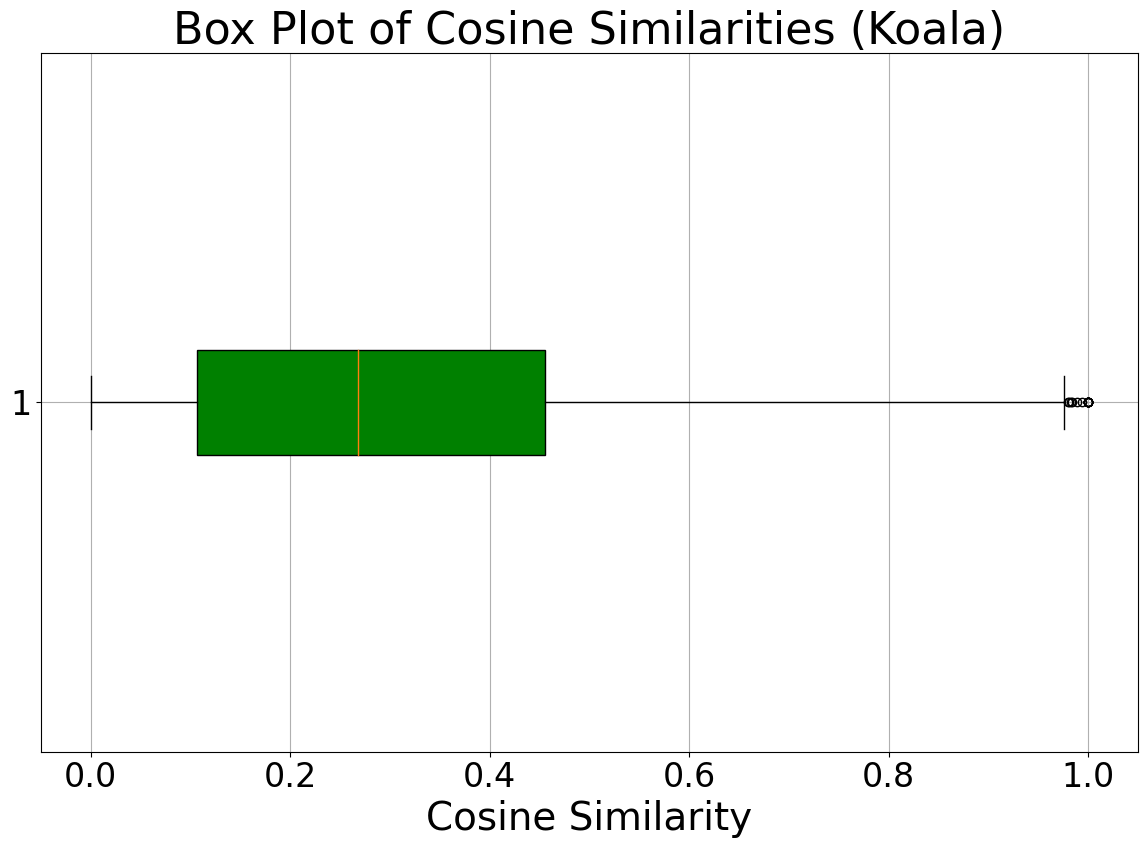

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from nltk.translate.bleu_score import sentence_bleu
from rouge import Rouge
from nltk.translate.meteor_score import single_meteor_score
from jiwer import wer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Initialize Rouge for ROUGE score calculation
rouge = Rouge()

# Initialize CountVectorizer for cosine similarity calculation
vectorizer = CountVectorizer()

# Initialize lists to store the metrics
bleu_scores = []
word_error_rates = []
cosine_similarities = []

mygt = ground_truth.copy()
mypt = predicted.copy()

for gt, prediction in zip(mygt, mypt):
    gt = str(gt)
    prediction = str(prediction)
    # Calculate BLEU score
    bleu_score = sentence_bleu([gt.split()], prediction.split())
    bleu_scores.append(bleu_score)

    # Calculate Word Error Rate
    error = wer(gt, prediction)
    word_error_rates.append(error)

    # Calculate Cosine Similarity
    vectors = vectorizer.fit_transform([gt, prediction]).toarray()
    csim = cosine_similarity(vectors)[0][1]
    cosine_similarities.append(csim)

# Convert lists to numpy arrays
bleu_scores = np.array(bleu_scores)
word_error_rates = np.array(word_error_rates)
cosine_similarities = np.array(cosine_similarities)

# Calculate average scores with 95% confidence intervals
bleu_mean = np.mean(bleu_scores)
bleu_std = np.std(bleu_scores)
bleu_ci = 1.96 * (bleu_std / np.sqrt(len(bleu_scores)))

wer_mean = np.mean(word_error_rates)
wer_std = np.std(word_error_rates)
wer_ci = 1.96 * (wer_std / np.sqrt(len(word_error_rates)))

cosine_mean = np.mean(cosine_similarities)
cosine_std = np.std(cosine_similarities)
cosine_ci = 1.96 * (cosine_std / np.sqrt(len(cosine_similarities)))

# Print average scores with confidence intervals
print("Average Scores with 95% Confidence Intervals:")
print(f"BLEU Score: {bleu_mean:.4f} +/- {bleu_ci:.4f}")
print(f"Word Error Rate: {wer_mean:.4f} +/- {wer_ci:.4f}")
print(f"Cosine Similarity: {cosine_mean:.4f} +/- {cosine_ci:.4f}")
print()

# Define custom colors for the plots
color_bleu = 'darkcyan'
color_wer = 'lightcoral'
color_cosine = 'green'

# Set a larger font size for all text elements
plt.rcParams.update({'font.size': 24})

# Plot BLEU Score
plt.figure(figsize=(12, 9))
plt.plot(bleu_scores, color=color_bleu, marker='o', linestyle='-', linewidth=2)
plt.xlabel('Sentence Pair', fontsize=28)  # Increase font size
plt.ylabel('BLEU Score', fontsize=28)     # Increase font size
plt.title('BLEU Score Comparison (Koala)', fontsize=32)  # Increase font size
plt.grid(True)
plt.tight_layout()
plt.savefig('bleu_scores.png', dpi=300)
plt.show()

# Plot Word Error Rate
plt.figure(figsize=(12, 9))
plt.plot(word_error_rates, color=color_wer, marker='o', linestyle='-', linewidth=2)
plt.xlabel('Sentence Pair', fontsize=28)  # Increase font size
plt.ylabel('Word Error Rate', fontsize=28)  # Increase font size
plt.title('Word Error Rate Comparison (Koala)', fontsize=32)  # Increase font size
plt.grid(True)
plt.tight_layout()
plt.savefig('word_error_rates.png', dpi=300)
plt.show()

# Plot Cosine Similarity
plt.figure(figsize=(12, 9))
plt.plot(cosine_similarities, color=color_cosine, marker='o', linestyle='-', linewidth=2)
plt.xlabel('Sentence Pair', fontsize=28)  # Increase font size
plt.ylabel('Cosine Similarity', fontsize=28)  # Increase font size
plt.title('Cosine Similarity Comparison (Koala)', fontsize=32)  # Increase font size
plt.grid(True)
plt.tight_layout()
plt.savefig('cosine_similarities.png', dpi=300)
plt.show()

# Plot Histogram for BLEU Score
plt.figure(figsize=(12, 9))
plt.hist(bleu_scores, bins=10, color=color_bleu, edgecolor='black')
plt.xlabel('BLEU Score', fontsize=28)  # Increase font size
plt.ylabel('Frequency', fontsize=28)   # Increase font size
plt.title('Histogram of BLEU Scores (Koala)', fontsize=32)  # Increase font size
plt.grid(True)
plt.tight_layout()
plt.savefig('bleu_histogram.png', dpi=300)
plt.show()

# Plot Histogram for Word Error Rate
plt.figure(figsize=(12, 9))
plt.hist(word_error_rates, bins=10, color=color_wer, edgecolor='black')
plt.xlabel('Word Error Rate', fontsize=28)  # Increase font size
plt.ylabel('Frequency', fontsize=28)        # Increase font size
plt.title('Histogram of Word Error Rates (Koala)', fontsize=32)  # Increase font size
plt.grid(True)
plt.tight_layout()
plt.savefig('wer_histogram.png', dpi=300)
plt.show()

# Plot Histogram for Cosine Similarity
plt.figure(figsize=(12, 9))
plt.hist(cosine_similarities, bins=10, color=color_cosine, edgecolor='black')
plt.xlabel('Cosine Similarity', fontsize=28)  # Increase font size
plt.ylabel('Frequency', fontsize=28)           # Increase font size
plt.title('Histogram of Cosine Similarities (Koala)', fontsize=32)  # Increase font size
plt.grid(True)
plt.tight_layout()
plt.savefig('cosine_histogram.png', dpi=300)
plt.show()

# Box Plot for BLEU Score
plt.figure(figsize=(12, 9))
plt.boxplot(bleu_scores, vert=False, patch_artist=True, boxprops=dict(facecolor=color_bleu))
plt.xlabel('BLEU Score', fontsize=28)  # Increase font size
plt.title('Box Plot of BLEU Scores (Koala)', fontsize=32)  # Increase font size
plt.grid(True)
plt.tight_layout()
plt.savefig('bleu_boxplot.png', dpi=300)
plt.show()

# Box Plot for Word Error Rate
plt.figure(figsize=(12, 9))
plt.boxplot(word_error_rates, vert=False, patch_artist=True, boxprops=dict(facecolor=color_wer))
plt.xlabel('Word Error Rate', fontsize=28)  # Increase font size
plt.title('Box Plot of Word Error Rates (Koala)', fontsize=32)  # Increase font size
plt.grid(True)
plt.tight_layout()
plt.savefig('wer_boxplot.png', dpi=300)
plt.show()

# Box Plot for Cosine Similarity
plt.figure(figsize=(12, 9))
plt.boxplot(cosine_similarities, vert=False, patch_artist=True, boxprops=dict(facecolor=color_cosine))
plt.xlabel('Cosine Similarity', fontsize=28)  # Increase font size
plt.title('Box Plot of Cosine Similarities (Koala)', fontsize=32)  # Increase font size
plt.grid(True)
plt.tight_layout()
plt.savefig('cosine_boxplot.png', dpi=300)
plt.show()


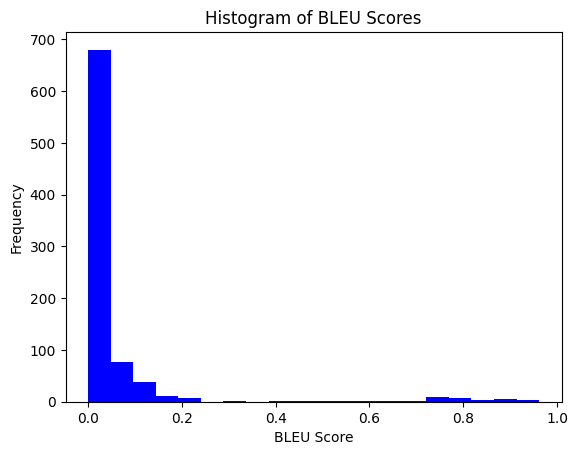

In [ ]:
plt.hist(bleu_scores, bins=20, color='blue')
plt.title('Histogram of BLEU Scores')
plt.xlabel('BLEU Score')
plt.ylabel('Frequency')
plt.show()


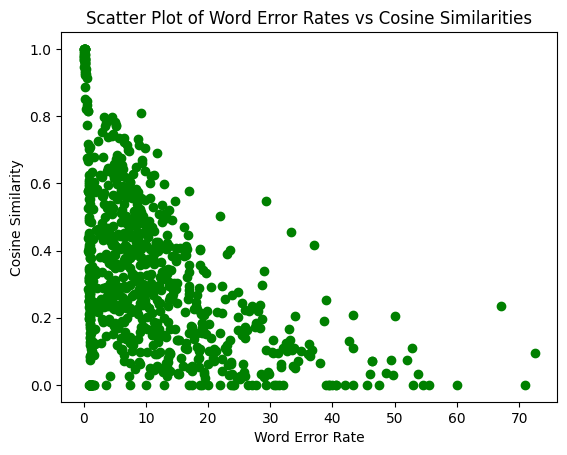

In [ ]:
plt.scatter(word_error_rates, cosine_similarities, color='green')
plt.title('Scatter Plot of Word Error Rates vs Cosine Similarities')
plt.xlabel('Word Error Rate')
plt.ylabel('Cosine Similarity')
plt.show()


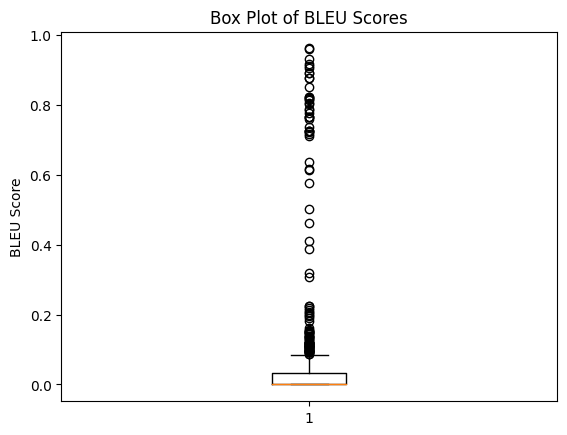

In [ ]:
plt.boxplot(bleu_scores)
plt.title('Box Plot of BLEU Scores')
plt.ylabel('BLEU Score')
plt.show()


Number of Examples with BLEU Score >= 0.5: 37
Number of Examples with Cosine Similarity >= 0.5: 181


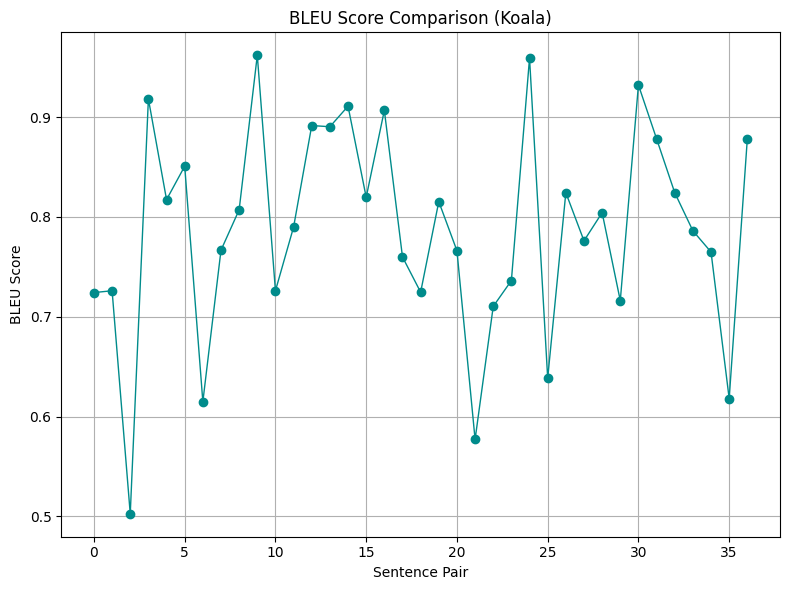

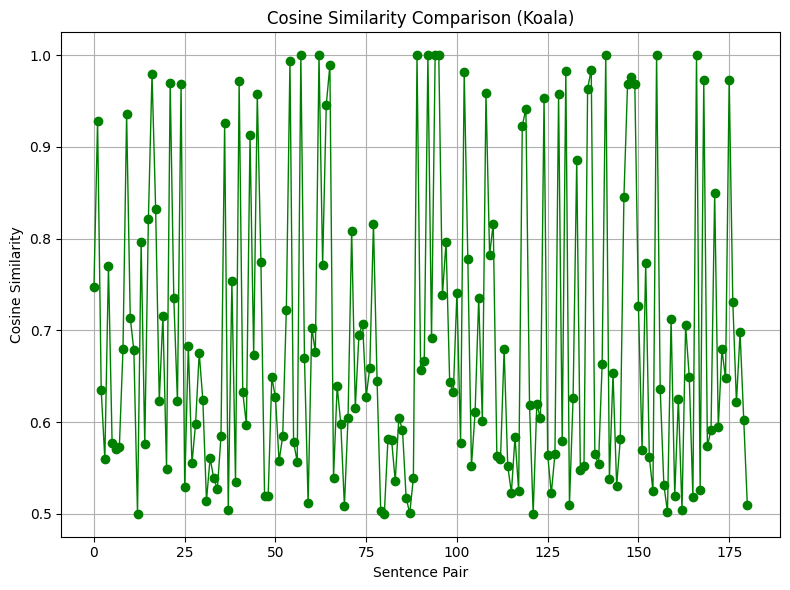

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from nltk.translate.bleu_score import sentence_bleu
from jiwer import wer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Initialize CountVectorizer for cosine similarity calculation
vectorizer = CountVectorizer()

# Initialize lists to store the metrics
bleu_scores = []
word_error_rates = []
cosine_similarities = []

mygt = ground_truth.copy()
mypt = predicted.copy()

for gt, prediction in zip(mygt, mypt):
    gt = str(gt)
    prediction = str(prediction)
    # Calculate BLEU score
    bleu_score = sentence_bleu([gt.split()], prediction.split())
    bleu_scores.append(bleu_score)

    # Calculate Word Error Rate
    error = wer(gt, prediction)
    word_error_rates.append(error)

    # Calculate Cosine Similarity
    vectors = vectorizer.fit_transform([gt, prediction]).toarray()
    csim = cosine_similarity(vectors)[0][1]
    cosine_similarities.append(csim)

# Convert lists to numpy arrays
bleu_scores = np.array(bleu_scores)
word_error_rates = np.array(word_error_rates)
cosine_similarities = np.array(cosine_similarities)

# Filter scores >= 0.5
bleu_filtered = bleu_scores[bleu_scores >= 0.5]
cosine_filtered = cosine_similarities[cosine_similarities >= 0.5]

# Calculate the count of examples
bleu_count = len(bleu_filtered)
cosine_count = len(cosine_filtered)

# Print the count of examples
print("Number of Examples with BLEU Score >= 0.5:", bleu_count)
print("Number of Examples with Cosine Similarity >= 0.5:", cosine_count)

# Define custom colors for the plots
color_bleu = 'darkcyan'
color_cosine = 'green'

# Plot BLEU Score (filtered)
plt.figure(figsize=(8, 6))
plt.plot(bleu_filtered, color=color_bleu, marker='o', linestyle='-', linewidth=1)
plt.xlabel('Sentence Pair')
plt.ylabel('BLEU Score')
plt.title('BLEU Score Comparison (Koala)')
plt.grid(True)
plt.tight_layout()
plt.savefig('bleu_scores.png', dpi=300)
plt.show()

# Plot Cosine Similarity (filtered)
plt.figure(figsize=(8, 6))
plt.plot(cosine_filtered, color=color_cosine, marker='o', linestyle='-', linewidth=1)
plt.xlabel('Sentence Pair')
plt.ylabel('Cosine Similarity')
plt.title('Cosine Similarity Comparison (Koala)')
plt.grid(True)
plt.tight_layout()
plt.savefig('cosine_similarities.png', dpi=300)
plt.show()
